In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import scipy as sp
import scipy.integrate as integrate
import scipy.constants as constants
from scipy.integrate import odeint
from scipy import linalg
import sympy as sym
from scipy.optimize import fmin
import time
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 6.0)
plt.rcParams['font.size'] = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from multiprocessing.dummy import Pool as ThreadPool 
from multiprocessing import Pool

for i in range(6):
    print("Starte mit Aufgabe %i nach spätestens %i Minuten!"% (i+1, 120/6*i))

Starte mit Aufgabe 1 nach spätestens 0 Minuten!
Starte mit Aufgabe 2 nach spätestens 20 Minuten!
Starte mit Aufgabe 3 nach spätestens 40 Minuten!
Starte mit Aufgabe 4 nach spätestens 60 Minuten!
Starte mit Aufgabe 5 nach spätestens 80 Minuten!
Starte mit Aufgabe 6 nach spätestens 100 Minuten!


In [2]:
def meantime(f, x, N):
    t = 0
    for i in range(1, N):
        tstart = time.clock()
        f(x)
        tend = time.clock()
        t += (tend - tstart)
    return t/N 

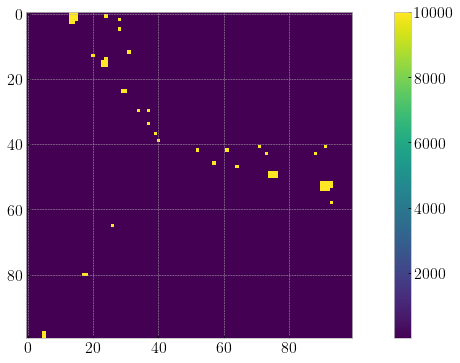

benötigte Zeit: 2.762706999999992


In [44]:
tstart = time.clock()

p = lambda z: z*z*z + (a - 1)*z - a
dp= lambda z: -1 + a + 3 *z**2
z = lambda x, y: x + 1j * y

def newtons_method(f, df, x0, e):
    i = 0
    while abs(0-f(x0)) > e:
        x0 = x0 - f(x0)/df(x0)
        i += 1
        if i > 1e4:
            break
    return i
a = 0
a = 0.32 + 1j * 1.64
x = np.linspace(-30,40,100)
y = np.linspace(-30,40,100)
iteration_matrix = np.zeros([len(x), len(y)])
for n_x, x_i in enumerate(x):
    for n_y, y_i in enumerate(y):
        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
plt.imshow(iteration_matrix)
plt.colorbar()
plt.show()

tend = time.clock()
print("benötigte Zeit:", (tend - tstart))
#1,9sec

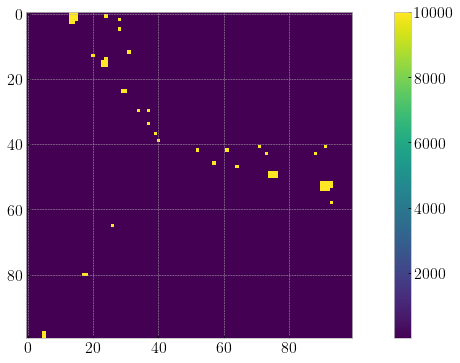

benötigte Zeit: 2.232374


In [12]:
tstart = time.clock()

p = lambda z: z*z*z + (a - 1)*z - a
dp= lambda z: -1 + a + 3 *z**2
z = lambda x, y: x + 1j * y

def newtons_method(f, df, x0, e):
    i = 0
    while abs(0-f(x0)) > e:
        x0 = x0 - f(x0)/df(x0)
        i += 1
        if i > 1e4:
            break
    return i

def my_function(n_x):
    x_i = x[n_x]
    for n_y, y_i in enumerate(y):
        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
#for n_x, x_i in enumerate(x):
#    for n_y, y_i in enumerate(y):
#        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
        

a = 0
a = 0.32 + 1j * 1.64
x = np.linspace(-30,40,100)
y = np.linspace(-30,40,100)
iteration_matrix = np.zeros([len(x), len(y)])

pool = ThreadPool() 
results = pool.map(my_function, range(len(x)))

        
        
plt.imshow(iteration_matrix)
plt.colorbar()
plt.show()

tend = time.clock()
print("benötigte Zeit:", (tend - tstart))

In [15]:
tstart = time.clock()

p = lambda z: z*z*z + (a - 1)*z - a
dp= lambda z: -1 + a + 3 *z**2
z = lambda x, y: x + 1j * y

def newtons_method(f, df, x0, e):
    i = 0
    while abs(0-f(x0)) > e:
        x0 = x0 - f(x0)/df(x0)
        i += 1
        if i > 1e4:
            break
    return i

def my_function(n_x, iteration_matrix):
    x_i = x[n_x]
    print(n_x)
    for n_y, y_i in enumerate(y):
        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
    test[0] = 10
#for n_x, x_i in enumerate(x):
#    for n_y, y_i in enumerate(y):
#        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
        

a = 0
a = 0.32 + 1j * 1.64
x = np.linspace(-30,40,100)
y = np.linspace(-30,40,100)
iteration_matrix = np.zeros([len(x), len(y)])

test = np.array([0,0,0])
pool = Pool(1) 
results = pool.map(lambda x: my_function(x, iteration_matrix), range(len(x)))
print(test)
        
        
plt.imshow(iteration_matrix)
plt.colorbar()
plt.show()

tend = time.clock()
print("benötigte Zeit:", (tend - tstart))

PicklingError: Can't pickle <function <lambda> at 0x7f99daaf4d08>: attribute lookup <lambda> on __main__ failed

In [18]:
tstart = time.clock()

p = lambda z: z*z*z + (a - 1)*z - a
dp= lambda z: -1 + a + 3 *z**2
z = lambda x, y: x + 1j * y

def newtons_method(f, df, x0, e):
    i = 0
    while abs(0-f(x0)) > e:
        x0 = x0 - f(x0)/df(x0)
        i += 1
        if i > 1e4:
            break
    return i

def my_function(n_x, iteration_matrix):
    x_i = x[n_x]
    print(n_x)
    for n_y, y_i in enumerate(y):
        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
    test[0] = 10
#for n_x, x_i in enumerate(x):
#    for n_y, y_i in enumerate(y):
#        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
        

a = 0
a = 0.32 + 1j * 1.64
x = np.linspace(-30,40,100)
y = np.linspace(-30,40,100)
iteration_matrix = np.zeros([len(x), len(y)])

test = np.array([0,0,0])
pool = Pool(1) 
for n_x, x_i in enumerate(x):
    
results = pool.map(lambda x: my_function(x, iteration_matrix), range(len(x)))
print(test)
        
        
plt.imshow(iteration_matrix)
plt.colorbar()
plt.show()

tend = time.clock()
print("benötigte Zeit:", (tend - tstart))

ValueError: setting an array element with a sequence.

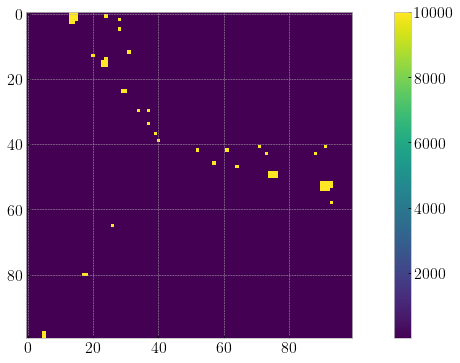

benötigte Zeit: 2.1763720000000006


In [19]:
tstart = time.clock()

p = lambda z: z*z*z + (a - 1)*z - a
dp= lambda z: -1 + a + 3 *z**2
z = lambda x, y: x + 1j * y

def newtons_method(f, df, x0, e):
    i = 0
    while abs(0-f(x0)) > e:
        x0 = x0 - f(x0)/df(x0)
        i += 1
        if i > 1e4:
            break
    return i

def my_function(n_x):
    x_i = x[n_x]
    for n_y, y_i in enumerate(y):
        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
#for n_x, x_i in enumerate(x):
#    for n_y, y_i in enumerate(y):
#        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
        

a = 0
a = 0.32 + 1j * 1.64
x = np.linspace(-30,40,100)
y = np.linspace(-30,40,100)
iteration_matrix = np.zeros([len(x), len(y)])

pool = ThreadPool() 
results = pool.map(my_function, range(len(x)))

        
        
plt.imshow(iteration_matrix)
plt.colorbar()
plt.show()

tend = time.clock()
print("benötigte Zeit:", (tend - tstart))

In [25]:
a = np.eye(10)
a = np.reshape(a, a.shape[0] * a.shape[1])
a

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [26]:
a = np.reshape(a, (10,10))
a

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

(1000, 1000)


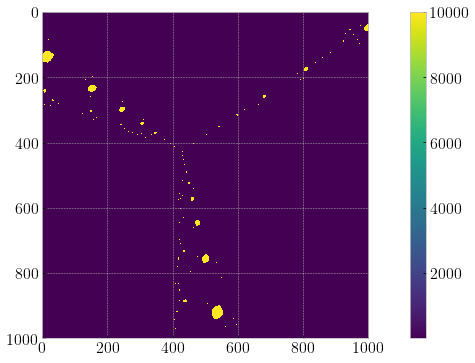

benötigte Zeit: 5.8908699999999925


In [43]:
tstart = time.clock()

f = lambda z: z*z*z + (a - 1)*z - a
df= lambda z: -1 + a + 3 *z**2
z = lambda x, y: x + 1j * y

def newtons_method(x0):
    i = 0
    while abs(0-f(x0)) > e:
        x0 = x0 - f(x0)/df(x0)
        i += 1
        if i > 1e4:
            break
    return i
a = 0
a = 0.32 + 1j * 1.64
n = 1000
e = 1e-3
x = np.linspace(-30,40,n)
y = np.linspace(-30,40,n)
X, Y = np.meshgrid(x,y)
iteration_matrix = np.zeros([len(x), len(y)])
z_matrix = z(X, Y)
iteration_vector = np.reshape(iteration_matrix, n*n)
z_vector = np.reshape(z_matrix, n*n)
 
pool = Pool() 
iteration_vector = pool.map(newtons_method,z_vector)
iteration_matrix = np.reshape(iteration_vector, (n, n))

plt.imshow(iteration_matrix)
plt.colorbar()
plt.show()

tend = time.clock()
print("benötigte Zeit:", (tend - tstart))
#1,9sec

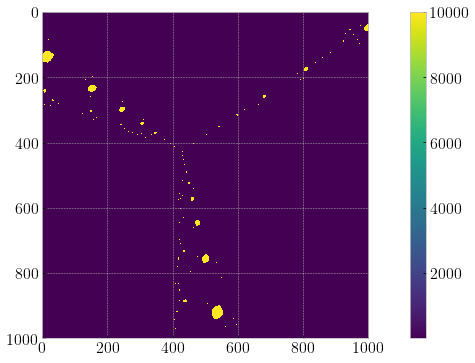

benötigte Zeit: 175.73655300000001


In [45]:
tstart = time.clock()

f = lambda z: z*z*z + (a - 1)*z - a
df= lambda z: -1 + a + 3 *z**2
z = lambda x, y: x + 1j * y

def newtons_method(x0):
    i = 0
    while abs(0-f(x0)) > e:
        x0 = x0 - f(x0)/df(x0)
        i += 1
        if i > 1e4:
            break
    return i
a = 0
a = 0.32 + 1j * 1.64
n = 1000
e = 1e-3
x = np.linspace(-30,40,n)
y = np.linspace(-30,40,n)
X, Y = np.meshgrid(x,y)
iteration_matrix = np.zeros([len(x), len(y)])
z_matrix = z(X, Y)
iteration_vector = np.reshape(iteration_matrix, n*n)
z_vector = np.reshape(z_matrix, n*n)
 
#pool = Pool()
pool = ThreadPool()
iteration_vector = pool.map(newtons_method,z_vector)
iteration_matrix = np.reshape(iteration_vector, (n, n))

plt.imshow(iteration_matrix)
plt.colorbar()
plt.show()

tend = time.clock()
print("benötigte Zeit:", (tend - tstart))
#1,9sec

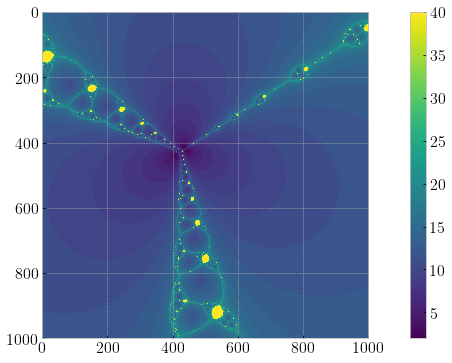

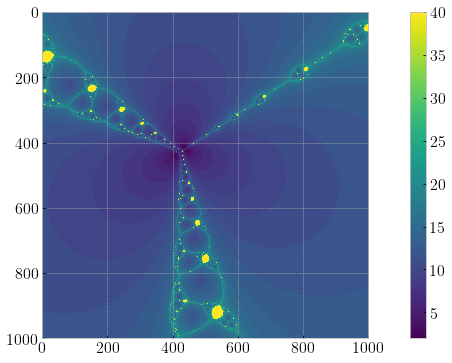

In [52]:
plt.imshow(iteration_matrix, vmax=40, interpolation="nearest")
plt.colorbar()
plt.show()
plt.imshow(iteration_matrix, vmax=40)
plt.colorbar()
plt.show()
